# Model Evaluation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore') 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [3]:
# Import the dataset Wisconsin breast cancer dataset from skelarn.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

# Create a DataFrame.
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))

# Assign the label 0 to benign samples and 1 to malignant samples
# change the datatype of target from float to integer.
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
# Check the structure of the dataset
cancer

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
cancer['target'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: target, dtype: float64

In [6]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
# Divide the dataset into train (80%) and test (20%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

SVC(probability=True, random_state=0)

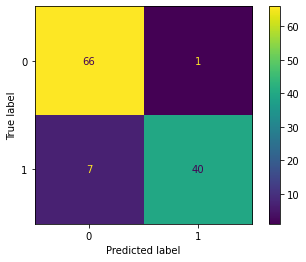

In [10]:
from sklearn.svm import SVC
clf = SVC(random_state=0, probability = True)
clf.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()  

array([[66,  1],
       [ 7, 40]], dtype=int64)

<AxesSubplot:>

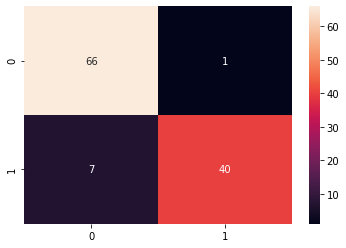

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [12]:
from sklearn.metrics import classification_report
target_names = ['Negative (0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Negative (0)       0.90      0.99      0.94        67
 Positive(1)       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [13]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
target_names = ['Negative (0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Negative (0)       0.90      0.99      0.94        67
 Positive(1)       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



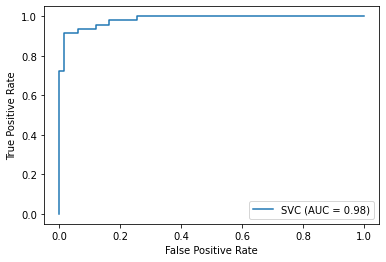

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)  
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

0.9844395046046364

In [21]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.98


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

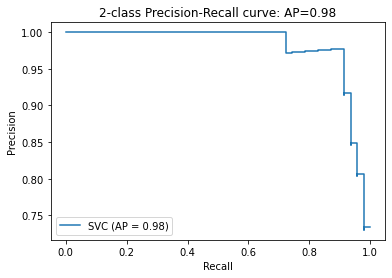

In [22]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(average_precision))

In [35]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_score)


0.04665283092042529

In [24]:
y_probas = clf.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

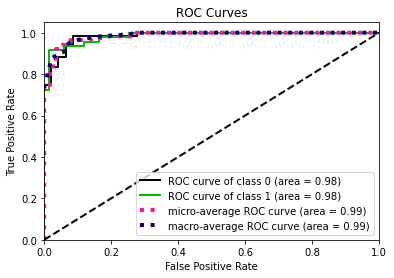

In [25]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

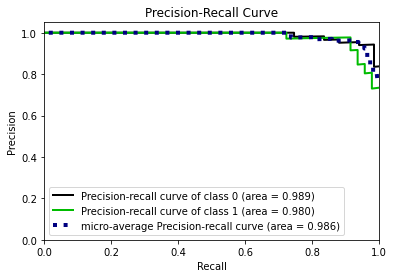

In [26]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

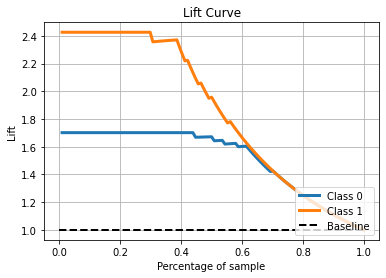

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

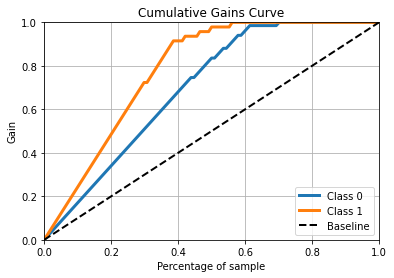

In [28]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

KstestResult(statistic=0.05263157894736842, pvalue=0.9976688849230171)

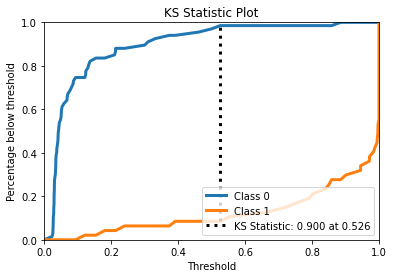

In [30]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
from scipy.stats import ks_2samp
ks_2samp(y_test, y_pred)

In [31]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)


0.163637239565042

In [33]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


0.8576521296725972

In [34]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8523794108125606

# End